## Mooring Comparisons with CTD's

- mooring data pulled from ERDDAP (preliminary or final)   
- ctd data pulled from ERDDAP (preliminary or final)   
    - multiple cruises for deployment/recovery


In [30]:
mooring_dataset = 'datasets_Mooring_18ck14a_preliminary'
ctd_datasets = ['CTD_os1901l1_preliminary','CTD_he1801']
ctd_casts = ['ctd029','ctd040']

In [2]:
from erddapy import ERDDAP
import pandas as pd
import numpy as np

In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker

import cmocean
### specify primary bulk figure parameters
fontsize = 10
labelsize = 10
#plotstyle = 'seaborn'
max_xticks = 10
plt.style.use('seaborn-ticks')
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['ps.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['pdf.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.minor.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 0.5
mpl.rcParams['ytick.major.size'] = 4
mpl.rcParams['ytick.minor.size'] = 2
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 0.5
mpl.rcParams['ytick.direction'] = 'out'
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['xtick.color'] = 'black'

In [4]:
server_url = 'http://downdraft.pmel.noaa.gov:8080/erddap'

In [6]:
### mooring urls
d = ERDDAP(server=server_url,
           protocol='tabledap',
           response='csv',
          )

d.dataset_id=mooring_dataset


df_m = d.to_pandas(
    index_col='time (UTC)',
    parse_dates=True,
    skiprows=(1,)  # units information can be dropped.
)

df_m.sort_index(inplace=True)
df_m.columns = [x[1].split()[0] for x in enumerate(df_m.columns)]

df_m.head()

,depth,latitude,longitude,temp,pres,sal,PAR,Chlorophyll_Fluorescence,Oxygen_Saturation,Oxygen_Concentration,timeseries_id,Instrument_Identifier,Serial_Number
time (UTC),,,,,,,,,,,,,
2018-08-07 21:00:00+00:00,39.0,71,197.549118,11.8602,NaN,0.0,NaN,NaN,NaN,NaN,18ck14a_sbe37_1866_37m.asc,s37,NaN
2018-08-07 22:00:00+00:00,39.0,71,197.549118,12.0901,NaN,0.0,NaN,NaN,NaN,NaN,18ck14a_sbe37_1866_37m.asc,s37,NaN
2018-08-07 23:00:00+00:00,39.0,71,197.549118,12.7990,NaN,0.0,NaN,NaN,NaN,NaN,18ck14a_sbe37_1866_37m.asc,s37,NaN
2018-08-08 00:00:00+00:00,39.0,71,197.549118,13.7565,NaN,0.0,NaN,NaN,NaN,NaN,18ck14a_sbe37_1866_37m.asc,s37,NaN
2018-08-08 01:00:00+00:00,39.0,71,197.549118,14.1097,NaN,0.0,NaN,NaN,NaN,NaN,18ck14a_sbe37_1866_37m.asc,s37,NaN


In [17]:
### ctd urls
df_ctd = {}
for ctd_dataset in ctd_datasets:
    d = ERDDAP(server=server_url,
               protocol='tabledap',
               response='csv',
              )

    d.dataset_id=ctd_dataset


    df = d.to_pandas(
        index_col='time (UTC)',
        parse_dates=True,
        skiprows=(1,)  # units information can be dropped.
    )

    df.sort_index(inplace=True)
    df.columns = [x[1].split()[0] for x in enumerate(df.columns)]

    df.head()
    df_ctd.update({ctd_dataset:df})

DatetimeIndex(['2019-08-15 01:22:26+00:00'], dtype='datetime64[ns, UTC]', name='time (UTC)', freq=None) time (UTC)
2019-08-15 01:22:26+00:00    6.479
Name: T_28, dtype: float64
evaluate at max cast depth 35.0 
 DatetimeIndex(['2018-08-14 10:39:00+00:00'], dtype='datetime64[ns, UTC]', name='time (UTC)', freq=None) time (UTC)
2018-08-14 10:39:00+00:00    2.1021
Name: T_28, dtype: float64
DatetimeIndex([], dtype='datetime64[ns, UTC]', name='time (UTC)', freq=None) Series([], Name: T_28, dtype: float64)
evaluate at max cast depth 35.0 
 DatetimeIndex(['2018-08-14 10:39:00+00:00'], dtype='datetime64[ns, UTC]', name='time (UTC)', freq=None) time (UTC)
2018-08-14 10:39:00+00:00    2.1021
Name: T_28, dtype: float64


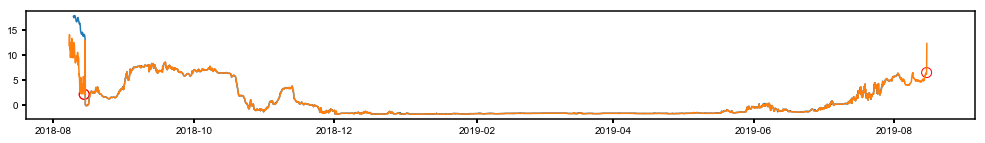

In [125]:
fig, ax = plt.subplots(figsize=(17, 2))
for name,group in df_m.groupby('timeseries_id'):
    ax.plot(group.index,group.temp)
    for cast,cgroup in df_ctd[ctd_datasets[0]].groupby('station_id'):
        if ctd_casts[0] in cast:
            ax.scatter(cgroup[cgroup.pressure == group.depth[0]].index,cgroup[cgroup.pressure == group.depth[0]].T_28, 
                       s=100, facecolors='none', edgecolors='r')
            print(cgroup[cgroup.pressure == group.depth[0]].index,
                  cgroup[cgroup.pressure == group.depth[0]].T_28)
    for cast,cgroup in df_ctd[ctd_datasets[1]].groupby('station_id'):
        if ctd_casts[1] in cast:
            if group.depth[0] > cgroup.pressure.max():
                ax.scatter(cgroup[cgroup.pressure == cgroup.pressure.max()].index,cgroup[cgroup.pressure == cgroup.pressure.max()].T_28, 
                           s=100, facecolors='none', edgecolors='r')            
                print(f'evaluate at max cast depth {cgroup.pressure.max()} \n',cgroup[cgroup.pressure == cgroup.pressure.max()].index,
                      cgroup[cgroup.pressure == cgroup.pressure.max()].T_28)                       
            else:
                ax.scatter(cgroup[cgroup.pressure == group.depth[0]].index,cgroup[cgroup.pressure == group.depth[0]].T_28, 
                           s=100, facecolors='none', edgecolors='r')            
                print(cgroup[cgroup.pressure == group.depth[0]].index,
                      cgroup[cgroup.pressure == group.depth[0]].T_28)            

evaluate at max cast depth 35.0 
 DatetimeIndex(['2018-08-14 10:39:00+00:00'], dtype='datetime64[ns, UTC]', name='time (UTC)', freq=None) time (UTC)
2018-08-14 10:39:00+00:00    31.76721
Name: S_41, dtype: float64
evaluate at max cast depth 35.0 
 DatetimeIndex(['2018-08-14 10:39:00+00:00'], dtype='datetime64[ns, UTC]', name='time (UTC)', freq=None) time (UTC)
2018-08-14 10:39:00+00:00    31.76721
Name: S_41, dtype: float64


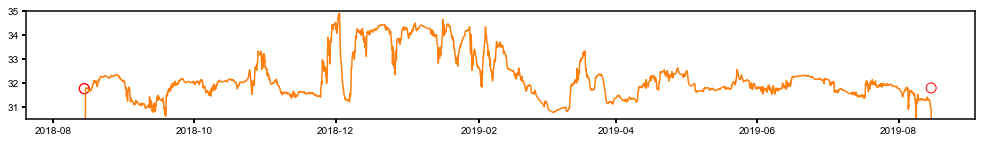

In [126]:
fig, ax = plt.subplots(figsize=(17, 2))
for name,group in df_m.groupby('timeseries_id'):
    ax.plot(group.index,group.sal)
    for cast,cgroup in df_ctd[ctd_datasets[0]].groupby('station_id'):
        if ctd_casts[0] in cast:
            ax.scatter(cgroup[cgroup.pressure == group.depth[0]].index,cgroup[cgroup.pressure == group.depth[0]].S_41, 
                       s=100, facecolors='none', edgecolors='r')
    for cast,cgroup in df_ctd[ctd_datasets[1]].groupby('station_id'):
        if ctd_casts[1] in cast:
            if group.depth[0] > cgroup.pressure.max():
                ax.scatter(cgroup[cgroup.pressure == cgroup.pressure.max()].index,cgroup[cgroup.pressure == cgroup.pressure.max()].S_41, 
                           s=100, facecolors='none', edgecolors='r')            
                print(f'evaluate at max cast depth {cgroup.pressure.max()} \n',cgroup[cgroup.pressure == cgroup.pressure.max()].index,
                      cgroup[cgroup.pressure == cgroup.pressure.max()].S_41)                       
            else:
                ax.scatter(cgroup[cgroup.pressure == group.depth[0]].index,cgroup[cgroup.pressure == group.depth[0]].S_41, 
                           s=100, facecolors='none', edgecolors='r')            
                print(cgroup[cgroup.pressure == group.depth[0]].index,
                      cgroup[cgroup.pressure == group.depth[0]].S_41)    
    ax.set_ylim([30.5,35])